# 🛰️ Space Traffic Simulation Demo
This notebook demonstrates a simplified orbital propagation using TLE data.
We will:
1. Load a sample TLE
2. Propagate satellite motion for 90 minutes
3. Visualize the orbit in 3D space

## 🔧 Step 1: Import simulation functions
We import helper functions to load TLE data and simulate satellite orbits.

In [7]:
import sys
import os

# ✅ Jupyter-safe way to add project root (one level above current working directory)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

# Import the orbit tools from src module
from src.data_loader import load_sample_tle, propagate_satellite

## 📡 Step 2: Load a sample TLE
TLE (Two-Line Element Set) represents satellite orbital parameters. Here we load one satellite's TLE.

In [8]:
# Load sample TLE list
tle_list = load_sample_tle()
# Unpack the first satellite (name, line1, line2)
name, l1, l2 = tle_list[0]
print(f"Satellite: {name}")

Satellite: ISS (ZARYA)


## 🛰️ Step 3: Propagate Satellite Orbit
We simulate the satellite's orbit path for the next 90 minutes.

In [9]:
# Compute satellite positions at 1-minute intervals over 90 minutes
positions = propagate_satellite((name, l1, l2), minutes=90)
print(f"Propagated {len(positions)} positions.")

Propagated 90 positions.


## 🌐 Step 4: Visualize the 3D Orbit Path
We visualize the trajectory using a 3D plot.

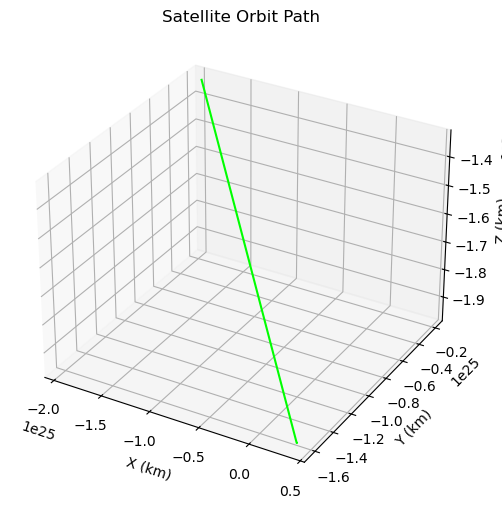

In [10]:
# Extract x, y, z coordinates from propagated positions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

xs, ys, zs = zip(*positions)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, ys, zs, color='lime')
ax.set_title('Satellite Orbit Path')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
plt.show()

In [11]:
import plotly.graph_objects as go

# 🎯 Plot interactive 3D orbit using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=xs, y=ys, z=zs,
    mode='lines',
    line=dict(color='deepskyblue', width=4),
    name='Orbit Path'
))

fig.update_layout(
    title="🛰️ Satellite Orbit Path",
    scene=dict(
        xaxis_title='X (km)',
        yaxis_title='Y (km)',
        zaxis_title='Z (km)'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# ✅ Save to docs/ folder for GitHub Pages
fig.write_html("../docs/traffic_visualization.html")
print("✅ Saved to: docs/traffic_visualization.html")


✅ Saved to: docs/traffic_visualization.html
